# Task 4 - Decision Trees

For this project we have to explore a iris dataset and try to classify the right species when given new input

# Import Libraries

**Import the usual libraries for pandas and plotting..**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

**Use pandas to read iris.csv as a dataframe called iris.**

In [2]:
iris = pd.read_csv('iris.csv')

**Check out the info(), head(), and describe() methods on iris**

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


we will drop the id column as it has no special meaning to the dataset

In [6]:
iris.drop(['Id'],axis=1,inplace=True)

In [7]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data visualisation


**lets create a count plot for the Species category**

<AxesSubplot:xlabel='Species', ylabel='count'>

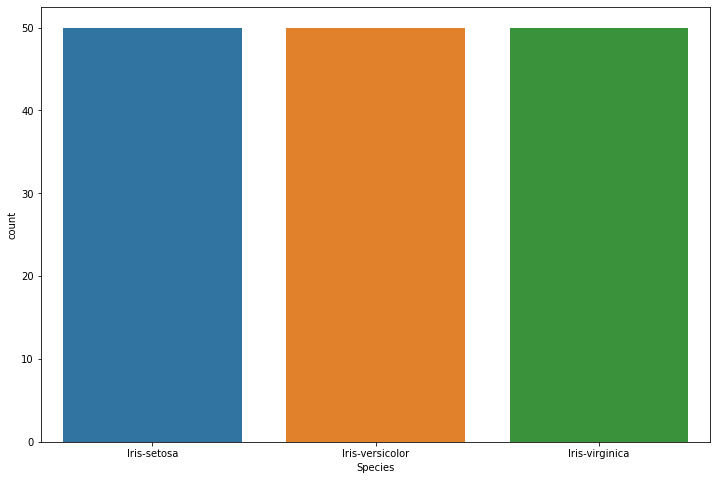

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=iris)

Following the graph we can see we have three types of species named IRIS-SETOSA, IRIS-VERSICOLOR, IRIS-VIRGINICA

Creating a box and wisker plot to see the outlier 

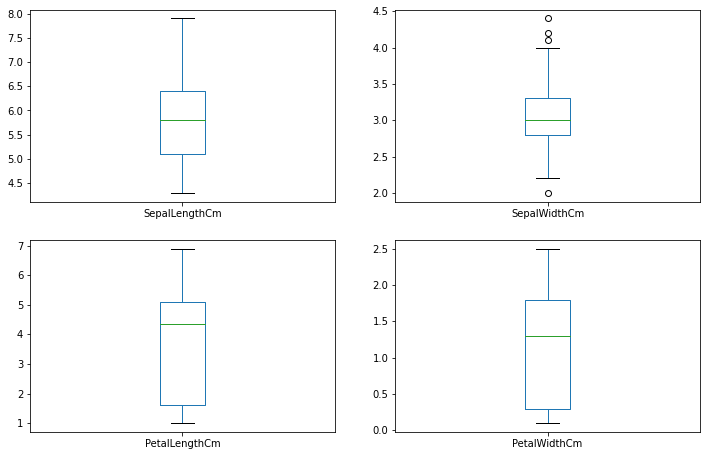

In [9]:
iris.plot(kind='box',subplots=True,layout=(3,2),figsize=(12,12),grid=False);

**finding the correlation for the given data**

In [10]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**As we can see some of the data have high correlation that means value 1 increase in the predicted value the data will change in original value.**

When the data have high correlation then we can say that the data are moving in similar direction.

**creating a heatmap for the correlation data**

<AxesSubplot:>

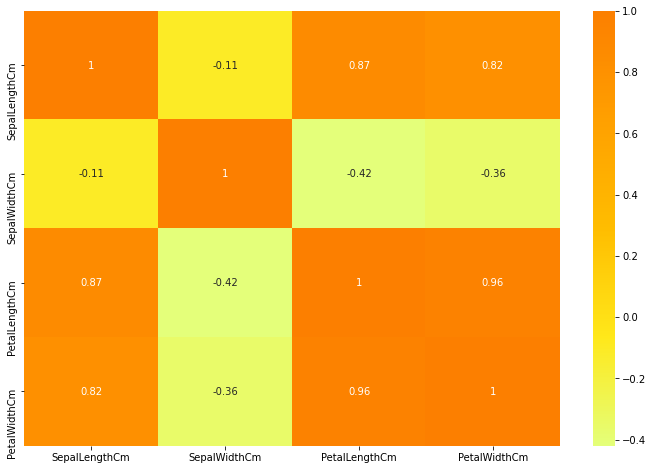

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(iris.corr(),annot=True,cmap='Wistia')

lets create a pairplot for getting more details

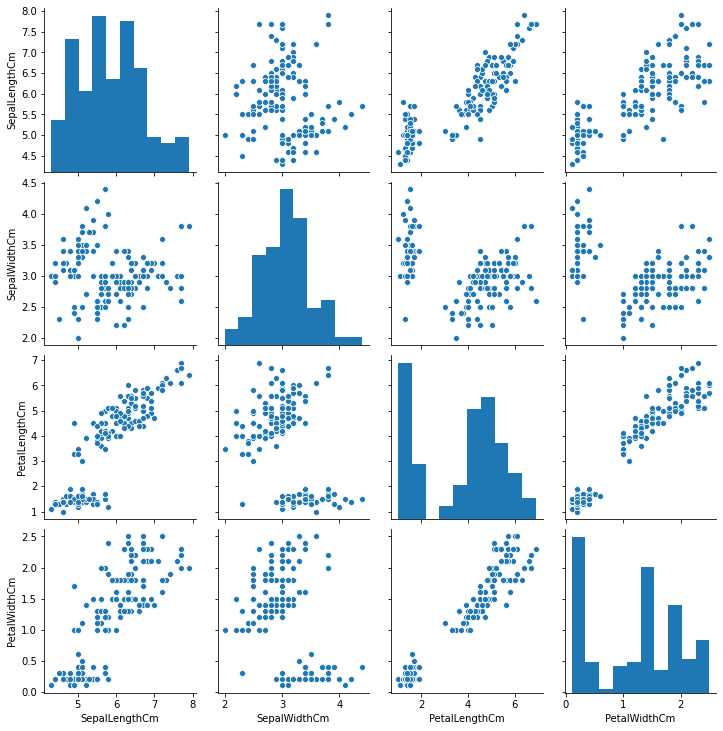

In [12]:
sns.pairplot(data=iris)

In [13]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Train test split

**now we have the neccessary data we can split the data into testing and training data using the sklearn train_test_split method**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = iris.drop(['Species'],axis=1)
y = iris['Species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Now we have splited he data into test and train data in the ratio of 70 and 30 respectively

## Using the sklearn decisionTreeClassifier we can fit the training data

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Once the data is fited now we can try to predict the data 

In [20]:
predictions = dtree.predict(X_test)
predictions

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

**compare the original and predicted data**


In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df.head()

,Actual,Predicted
74,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica
96,Iris-versicolor,Iris-versicolor


## Metric evaluation

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.79      0.79      0.79        14
 Iris-virginica       0.79      0.79      0.79        14

       accuracy                           0.87        45
      macro avg       0.86      0.86      0.86        45
   weighted avg       0.87      0.87      0.87        45



In [24]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 11  3]
 [ 0  3 11]]


# NOTE : Due to the equal number of data in the species feature that is count of unique value in Species column, we have entropy=1

## Entropy is the measure of impurity, here in our data we have less impurity hence the classified value is close to actual value
## Hence we can say our machine classified the data exactly correct.

# For Decision tree we have to select the best attribute for creating a root node.
**so we have to analyse the data and create a tree to get the best attribute**
**The attribute with the best information gain will be selected as node attribute** 
**Based on the node the spread of tree will be decided**
**Lets see how machine chose the best attribute**

lets draw out the tree using the various data


In [25]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Tree Creation


In [26]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(iris.columns[:4])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

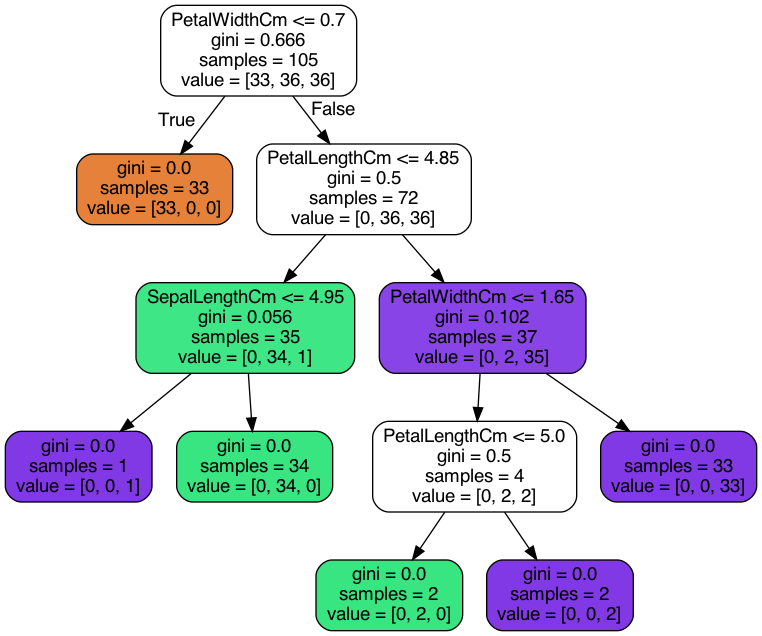

In [27]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 